## Análise exploratória do IFOOD
* Neste notebook, realizarei a análise exploratória dos dados do Ifood.
* O objetivo consiste em desvendar padrões e insights sobre os dados.
* Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão aplicadas.


## Hipóteses

* Qual é o maior salário encontrado na nossa base? 
* Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? 
* Nossos clientes tem níveis de educação maiores ou menores? 
* Quantos clientes temos em cada estado civil? 

* Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? 
* As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? 
* Pessoas que têm um maior salário gastam mais? 


In [2]:
import sys
import os

# Data manipulation and visualization.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import math

# Adiciona a pasta raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Utils.
from src.eda_utils import *

# Visualize all the columns.
pd.set_option('display.max_columns', None)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
VERMELHO_FORTE = '#461220'
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

In [3]:
# Read the dataset.
path = 'D:\DataSciece - IFOOD\Dataset\mkt_data.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [4]:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [5]:
df.shape

(2205, 44)

In [6]:
df.duplicated().value_counts()

False    2205
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [8]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

#substituindo por booleano

for item in colunas_com_nulos:
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1) #se for nulo, substituimos por 0, caso contrário substituimos por 1

In [9]:
df.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,230.0,854.0,477.0,568.0,76.0,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,1.0,5.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2204.000000,113734.000000,2.000000,2.0

## Salários dos clientes

(array([ 11.,  26.,  61., 124., 141., 192., 207., 191., 174., 177., 180.,
        186., 174., 157., 125.,  48.,  24.,   4.,   2.,   1.]),
 array([  1730. ,   7330.2,  12930.4,  18530.6,  24130.8,  29731. ,
         35331.2,  40931.4,  46531.6,  52131.8,  57732. ,  63332.2,
         68932.4,  74532.6,  80132.8,  85733. ,  91333.2,  96933.4,
        102533.6, 108133.8, 113734. ]),
 <BarContainer object of 20 artists>)

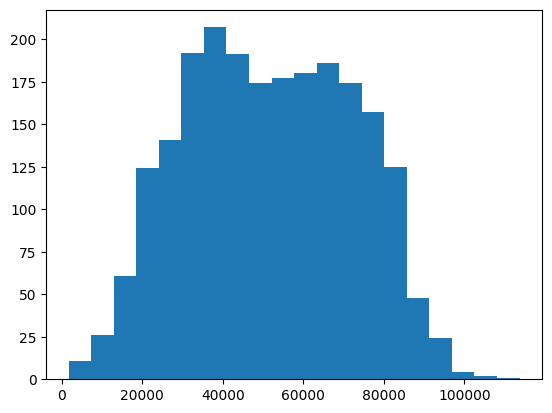

In [10]:
plt.hist(df['Income'], bins=20, histtype='bar')

In [11]:
fig = px.box(df, y="Income", title="Boxplot da Distribuição de Renda")
fig.show()

## CV

In [12]:

df["Income"].std()/df["Income"].mean()

np.float64(0.4012441554786958)

## Skew

In [13]:
df["Income"].skew()

np.float64(0.013164263414417078)

## Marital status

In [14]:
(df['marital_status'].value_counts(normalize=True) * 100).to_frame()

,proportion
marital_status,
Married,38.730159
Together,25.759637
Single,21.632653
Divorced,10.430839
Widow,3.446712


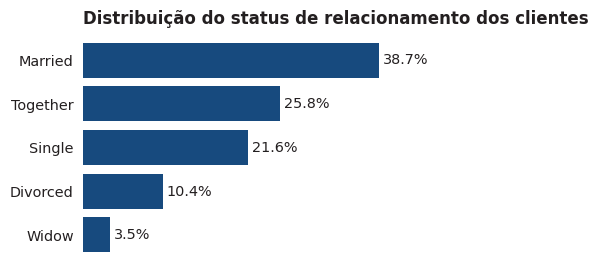

In [15]:
marital_status_grouped = df.groupby(['marital_status'])[['marital_status']].count().rename(columns={'marital_status': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
marital_status_grouped['pct'] = round(marital_status_grouped['count'] / np.sum(marital_status_grouped['count']) * 100, 2) 


barh_plot(marital_status_grouped, 'marital_status', 'pct', 
          title='Distribuição do status de relacionamento dos clientes', 
          ytick_range=(range(len(marital_status_grouped))), invert_yaxis=True, figsize=(4, 3))

* Ao analisar a porcentagem de cada status civil, observamos que a maior parcela dos usuários (38.7 %) são casados e a segunda maior com 25.7 % estão juntos.

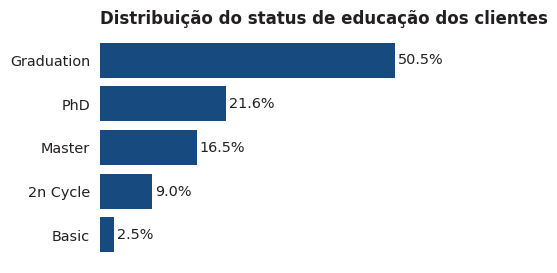

In [16]:
education_status_grouped = df.groupby(['education_level'])[['education_level']].count().rename(columns={'education_level': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
education_status_grouped['pct'] = round(education_status_grouped['count'] / np.sum(education_status_grouped['count']) * 100, 2) 


barh_plot(education_status_grouped, 'education_level', 'pct', 
          title='Distribuição do status de educação dos clientes', 
          ytick_range=(range(len(education_status_grouped))), invert_yaxis=True, figsize=(4, 3))


* Maior parcela dos usuários estão na graduação, uma porcentagem de 50.5% da amostra

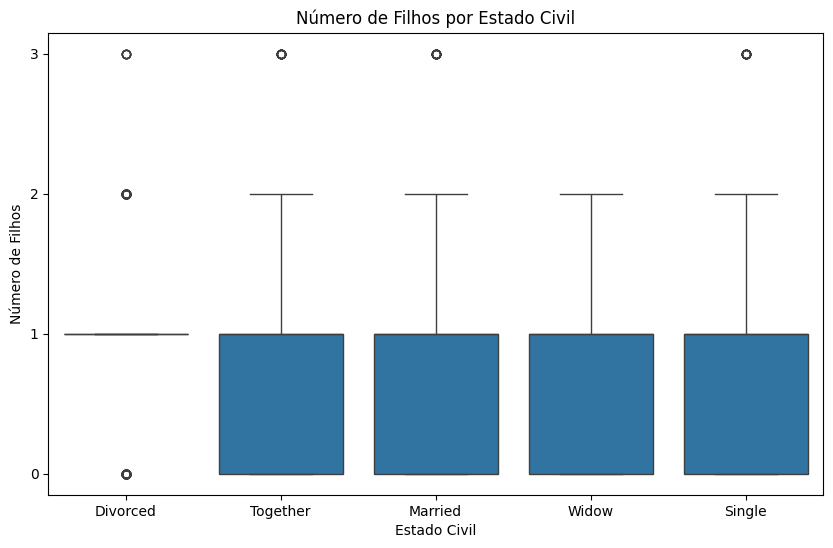

In [17]:
# Agrupando dados
data_grouped = df.groupby('marital_status')['kids'].mean().reset_index()

# Ordenando para melhor visualização
data_grouped = data_grouped.sort_values(by='kids', ascending=False)

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='kids', data=df, order=data_grouped['marital_status'])
plt.title('Número de Filhos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Filhos')

# Ajustando os ticks do eixo y para mostrar apenas valores inteiros
plt.yticks([0, 1, 2, 3])
plt.grid(False)
plt.show()

* A maioria das categorias ("Together", "Married", "Widow", "Single") possui uma distribuição de número de filhos bastante semelhante, com a mediana próxima de 1.

* A categoria "Divorced" tem uma distribuição de número de filhos muito estreita, com a mediana e o intervalo interquartil (IQR) em torno de 1 filho.

* Existem vários outliers em todas as categorias, o que indica que há casos excepcionais com número de filhos maior que o típico. Estes outliers são mais evidentes nas categorias "Together", "Married", "Widow" e "Single", com valores chegando até 3 filhos.

In [18]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


* Apesar dos números serem muito próximos, olhando apenas a média dizemos que single (solteiros) tem uma quantidade menor de filhos quando comparado aos outros grupos. Porém, como podemos ver no boxplot e na mediana, é um número muito próximo um do outro. Precisaríamos de um teste de hipótese para comprovar diferenças

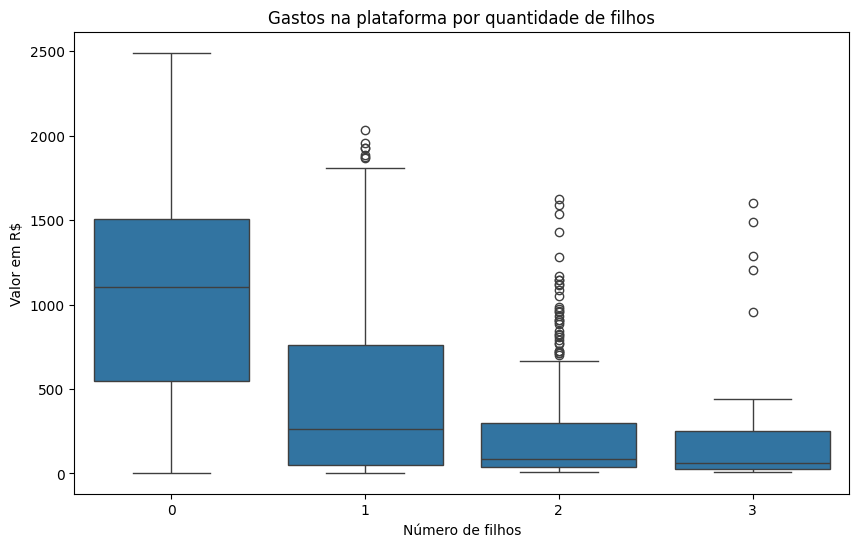

In [19]:
# Agrupando dados
data_grouped = df.groupby('kids')['expenses'].mean().reset_index()

# Ordenando para melhor visualização
data_grouped = data_grouped.sort_values(by='expenses', ascending=False)

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='kids', y='expenses', data=df)
plt.title('Gastos na plataforma por quantidade de filhos')
plt.xlabel('Número de filhos')
plt.ylabel('Valor em R$')
plt.grid(False)
plt.show()

* **Tendência Decrescente:** Observa-se uma tendência clara de diminuição dos gastos na plataforma à medida que o número de filhos aumenta.
* **Variabilidade:** A variabilidade dos gastos também diminui com o aumento do número de filhos, indicando que os gastos são mais homogêneos entre famílias com mais filhos.
* **Outliers:** Embora existam outliers em todas as categorias, eles são mais frequentes nas categorias com menos filhos, especialmente na categoria de 1 filho.

In [20]:
#calculando a média de gastos
df.groupby("kids")["expenses"].mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

In [21]:
#calculando a mediana
df.groupby("kids")["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

* Podemos ver que tanto a média quanto a mediana 0 e 1 filho é maior nessa amostra de dados, porém a média de 2 filhos é menor do que de 3 filhos, enquanto a mediana de 2 filhos é maior do que de 3 filhos. 
* Ambos os grupos 2 e 3 tem médias bem maiores do que a mediana, indicando outliers superiores (o próprio gráfico já mostra isso). 
* Grupo 1 também tem outliers superiores, mas essa diferença é menos acentuada. Pessoas com nenhum filho tem uma distribuição um pouco mais similar a uma normal (sem outliers, e mediana levemente centrada do meio do boxplot)

#### Teste de hipótese para comprova que a média de gastos entre as pessoas que tem filhos ou nao é realmente diferente.


In [23]:
# Separar os dados em se tem filhos ou nao

df["expenses_com_filhos"] = np.where(df["kids"] != 0, df["expenses"], np.nan)
df["expenses_sem_filhos"] = np.where(df["kids"] == 0, df["expenses"], np.nan)

In [27]:
num_expenses_sem_filhos = df["expenses_sem_filhos"].count()
print(f"Sem filhos: ",num_expenses_sem_filhos)
num_expenses_com_filhos = df["expenses_com_filhos"].count()
print(f"Com filhos: ",num_expenses_com_filhos)

Sem filhos:  628
Com filhos:  1577


Aqui não temos o desvio-padrão populacional de cada uma das amostras, mas temos os desvios e médias amostrais. Como nossa amostra é grande e queremos comprovar diferença de médias, podemos usar o teste t para amostras independentes

H0: média com filhos = média sem filhos

H1: média com filhos diferente média sem filhos

Vamos usar 95% de confiança

In [30]:
from scipy import stats
import numpy as np


# Removendo valores NaN e obtendo as amostras
amostra_com_filhos = df["expenses_com_filhos"].dropna()
amostra_sem_filhos = df["expenses_sem_filhos"].dropna()

# Calculando o teste t
t_stat, p_value = stats.ttest_ind(amostra_com_filhos, amostra_sem_filhos)

# Exibindo os resultados
print("Estatística t:", t_stat)
print("Valor-p:", p_value)

# Verificando o resultado com nível de confiança de 95%
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Há uma diferença significativa entre as médias das despesas de pessoas com e sem filhos.")
else:
    print("Falhamos em rejeitar H0: Não há diferença significativa entre as médias das despesas de pessoas com e sem filhos.")

Estatística t: -28.902593571564687
Valor-p: 5.171525024868465e-156
Rejeitamos H0: Há uma diferença significativa entre as médias das despesas de pessoas com e sem filhos.


#### Verificar se há diferenças de gastos em quem tem 1, 2, 3 ou mais filhos 

In [31]:
df['kids'].value_counts()

kids
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

In [38]:
df.groupby(["kids"]).expenses.mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

A premissa para usarmos ANOVA 1 fator é:

Amostras aleatórias
Grupos independentes
A variável dependente é contínua
Amostras tem pelo menos n = 15 cada
Variancias populacionais em cada grupo é igual

**H0: Todas as médias do grupo são iguais.**

**Ha: Nem todas as médias do grupo são iguais.**

Precisamos verificar se todas as variâncias são iguais

In [43]:
um_filho = df[df['kids'] == 1].expenses.dropna()
dois_filhos = df[df['kids'] == 2].expenses.dropna()
tres_filhos = df[df['kids'] == 3].expenses.dropna()


In [44]:
stats.bartlett(um_filho,dois_filhos,tres_filhos)

BartlettResult(statistic=np.float64(102.21719770243517), pvalue=np.float64(6.365280420300725e-23))

#### Como p-valor é menor que alpha, concluimos que elas não tem a mesma variancia. Portanto, poderiamos usar a ANOVA de Welch

INOVA WELCH

In [49]:
import pingouin as pg
import numpy as np

df_com_filhos = df[df.kids != 0]
pg.welch_anova(dv='expenses', between='kids', data=df_com_filhos)

,Source,ddof1,ddof2,F,p-unc,np2
0,kids,2,132.724442,59.721904,3.178541e-19,0.051464


* pvalor é menor do que alpha (0.05), portanto, rejeitamos H0 e concluimos que a 95% de confiança, todas as médias não são iguais

In [50]:
#teste nao parametrico games howell
pg.pairwise_gameshowell(dv='expenses', between='kids', data=df_com_filhos)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,0.000000,0.513077
1,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,0.002888,0.437688
2,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,0.958487,-0.052201


Apenas quando p-valor for maior do que 5e-02 aceitamos H0 (médias iguais). Logo, todas as médias são consideradas diferentes, exceto a 2-3.

Portanto, caso a equipe queira se focar na amostra com menor média, eles poderão focar tanto no grupo 2 quanto no 3.

#### Correlação

<Axes: xlabel='Income', ylabel='expenses'>

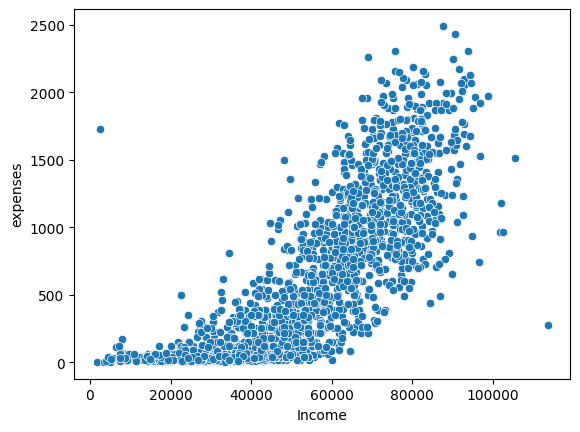

In [ ]:
sns.scatterplot(x='Income', y='expenses', data=df)

In [ ]:
df["expenses"].corr(df["Income"])

np.float64(0.8230660021398378)

**Aparentemente existe uma correlação diretamente proporcional, em que pessoas que ganham mais também gastam mais**

<Axes: xlabel='Income', ylabel='education_level'>

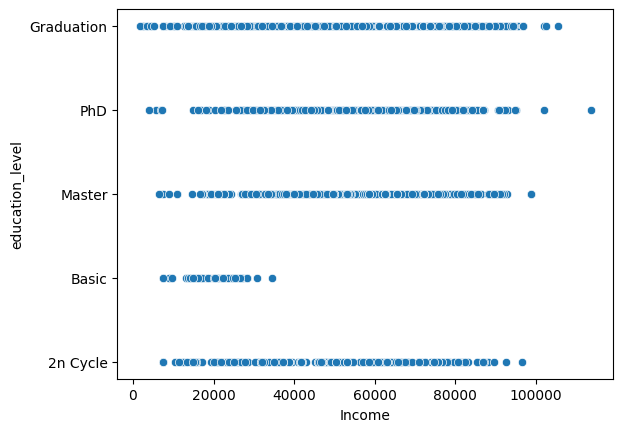

In [ ]:
sns.scatterplot(x='Income', y='education_level', data=df)

(array([ 10.,  33.,  76., 100.,  79., 120., 179., 239., 234., 145., 145.,
        159., 128., 143., 103., 136., 100.,  53.,  21.,   2.]),
 array([24. , 26.8, 29.6, 32.4, 35.2, 38. , 40.8, 43.6, 46.4, 49.2, 52. ,
        54.8, 57.6, 60.4, 63.2, 66. , 68.8, 71.6, 74.4, 77.2, 80. ]),
 <BarContainer object of 20 artists>)

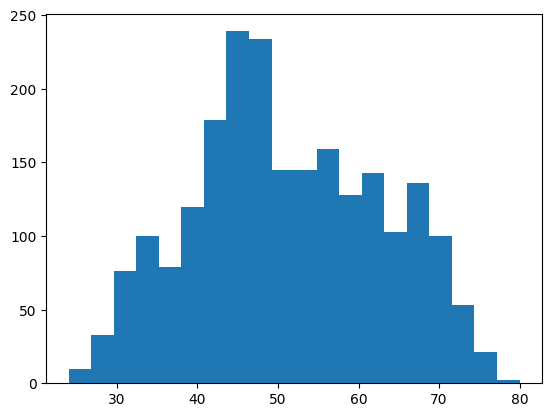

In [ ]:
plt.hist(df['Age'],bins=20)

## Insights

* O maior salário entre os clientes é R$ 11.3734.

* Mais da metade dos clientes (50.5%) estão na **Graduação**.

* A maior parte dos clientes estão casados (38.7%) ou estão juntos (25.8%).

* Foi observado que as pessoas solteiras tentem a gastar mais com o aplicativo, o que faz sentido, pois quando se tem um casamento ou filhos, os gastos são distribuidos e possa ser que nao se tenha tanta folga para gastar com aplicativos de pedido de alimentos.

* Observou-se também que existe uma correlaçao positiva entre o salário da pessoa e o gasto no aplicativo, onde quanto maior o salário a tentedencia é o maior gasto no app.

* Pessoas que possuem so o ensino básico **não** passam de 40k de salário.

* Maior quantidade de usuários cadrastados estão entre 40 e 50 anos de idade.
